Introduction to Python
================================

Lesson 4 - Part1
--------

## Summary 

In this lesson we will focus on Neural Network. The lesson is divided between an introduction an a technical part
The topis that we'll cover are in the introduction are:

  - Tensorflow
  - Keras 
  
For the technical part we will create some models for:

  - Single class classification
  - Multi class classification
  - Custom model


## Introduction

Today there are many framework that allow to create a Neural Network, like:

  - Tensorflow 
  - Theano
  - Caffe
  - MXNett
  - CNTK
  
Among all of them, probabilly the most famous is Tensorflow.

Considering the support, the community the resources available, Tensorflow is the engine chosen for this course.  

## Tensorflow

[Tensorflow](https://www.tensorflow.org/) it was originally developed by Google, now it's open source.

The definition from the web site is the following:

*TensorFlow™ is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.*

Google has deeply invested in this project, to the point that now in Google Cloud there are available some instances with GPU's (called TPU's) designed especially for TensorFlow. 

## Keras

In order to simply the definition of the Neural Network and to speed up the development time we'll not use TensorFlow directly.
Instead we'll use [Keras](https://keras.io/).

The definition from the website is the following:

*Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
*

As you can see from the description, Keras offers another advantage: with just a change of setting the same code can be used with:

  - Tensorflow
  - Theano
  - CNTK

## Tensorflow 2.0

Tensorflow 2.0 has been released on September 30th 2019.

The main new feature in this new relese in that Keras' API are now the official High Level APIs of Tensorflow, directly supported by the project itself.

Quoting the home page of Keras:

*At this time, we recommend that Keras users who use multi-backend Keras with the TensorFlow backend switch to tf.keras in TensorFlow 2.0. tf.keras is better maintained and has better integration with TensorFlow features (eager execution, distribution support and other).*


## Comparison between Keras and Tensorflow

In order to undestand the advantage of using Keras, we will consider the code necessary to define the same network using TensorFlow directly or Keras.

Before moving on we must remember what are the parameters involved with a neural network.

Can you list me those parameters?

  - num imp.
  - num. layers
  - num. out 
  - node in layers 
  - activation 
  - loss
  - optimization
  - epoch 
  - batch size

## TensoFlow Multiclass

This is an example of how it was to create a neural network using "pure" Tensorflow. 
The dataset used was the classic [mnsit](http://yann.lecun.com/exdb/mnist/) hand written digits with two hidden layer to classify samples in to the 10 possible classes. 

**NOTE:** this example is not working anymore, due to the changes between Tensorflow v1 and v2.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

In [ ]:
mnist.test

In [ ]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.1
num_steps = 15
batch_size = 128
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

## Keras Multiclass

Let's create a neural network to be used over the classic [mnsit](http://yann.lecun.com/exdb/mnist/) hand written digits with two hidden layer to classify samples in to the 10 possible classes.

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X, Y), (X_test, Y_test) = mnist.load_data()
X, X_test = X / 255.0, X_test / 255.0
print(X.shape)
x_ex = X[1,:,:]
x_ex.shape

(60000, 28, 28)


(28, 28)

In [17]:
import pandas as pd
import numpy as np
from tensorflow import keras as keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#from tensorflow.keras import advanced_activations
from keras.optimizers import Adam

# Parameters
learning_rate = 0.001
num_steps = 10
batch_size = 128

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

#
activationFun = 'relu'
#activationFun = 'softmax'

tryOverfit = True

#Definition of the model type
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(n_hidden_1,activation=activationFun))
if tryOverfit:
    model.add(Dense(n_hidden_2,activation=activationFun))

model.add(Dense(num_classes,activation='softmax'))

#Creation of the model
adam = Adam(lr=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam,metrics=['accuracy'])
#Fit of the network
mnist = tf.keras.datasets.mnist
(X, Y), (X_test, Y_test) = mnist.load_data()
X, X_test = X / 255.0, X_test / 255.0
history = model.fit(X, Y, epochs=num_steps, batch_size=batch_size,validation_split=0.05)#validation_data=(X_test,Y_test)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
446/446 [==============================] - 4s 10ms/step - loss: 0.2874 - accuracy: 0.9175 - val_loss: 0.1078 - val_accuracy: 0.9697
Epoch 2/10
446/446 [==============================] - 4s 8ms/step - loss: 0.1095 - accuracy: 0.9670 - val_loss: 0.0779 - val_accuracy: 0.9817
Epoch 3/10
446/446 [==============================] - 4s 8ms/step - loss: 0.0716 - accuracy: 0.9790 - val_loss: 0.0736 - val_accuracy: 0.9793
Epoch 4/10
446/446 [==============================] - 4s 9ms/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0861 - val_accuracy: 0.9763
Epoch 5/10
446/446 [==============================] - 3s 8ms/step - loss: 0.0399 - accuracy: 0.9874 - val_loss: 0.0690 - val_accuracy: 0.9800
Epoch 6/10
446/446 [==============================] - 4s 8ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0737 - val_accuracy: 0.9810
Epoch 7/10
446/446 [==============================] - 4s 10ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0737 - val_accuracy: 0.9833
Epoc

## Warning

Keras is an API, so the implementation of function is not one to one with TensorFlow. Often similar parameters can bring to different results.

**You have to optimize the network for Keras, not for Tensorflow**.

## Analysis' Results

If we take a closer look to the results of the network what we can see?

During the fit of the model, with `history = model.fit`, we have stored in `history` all the values of **loss** and **accuracy** for train and test.

Note that must pass some validation data or a validation split using `validation_data` or `validation_split` parameters in `model.fit` 

We can define these and other metrics to be use using the parameter `metrics` in `model.compile`.

In [6]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.315448,0.910193,0.132399,0.968000
1,0.136765,0.960649,0.087144,0.977667
2,0.091477,0.973842,0.075194,0.981000
3,0.067522,0.980193,0.064990,0.984333
4,0.052308,0.984544,0.067981,0.980333
5,0.041884,0.987456,0.058200,0.986000
6,0.032398,0.991193,0.062586,0.983000
7,0.026082,0.993246,0.058798,0.983333
8,0.021145,0.994789,0.063087,0.980000
9,0.016616,0.996140,0.065787,0.982667


In [12]:
history.history

{'loss': [0.3154478073120117,
  0.1367649883031845,
  0.0914771780371666,
  0.06752198189496994,
  0.05230846628546715,
  0.041884277015924454,
  0.03239814192056656,
  0.02608170174062252,
  0.021144993603229523,
  0.016615744680166245],
 'accuracy': [0.9101929664611816,
  0.9606491327285767,
  0.9738420844078064,
  0.9801929593086243,
  0.9845438599586487,
  0.9874561429023743,
  0.9911929965019226,
  0.9932456016540527,
  0.9947894811630249,
  0.9961403608322144],
 'val_loss': [0.1323985606431961,
  0.0871439278125763,
  0.07519359141588211,
  0.06498996168375015,
  0.06798090785741806,
  0.058200206607580185,
  0.06258579343557358,
  0.058797769248485565,
  0.06308655440807343,
  0.06578738242387772],
 'val_accuracy': [0.9679999947547913,
  0.9776666760444641,
  0.9810000061988831,
  0.984333336353302,
  0.9803333282470703,
  0.9860000014305115,
  0.9829999804496765,
  0.9833333492279053,
  0.9800000190734863,
  0.9826666712760925]}

Text(0, 0.5, 'Loss')

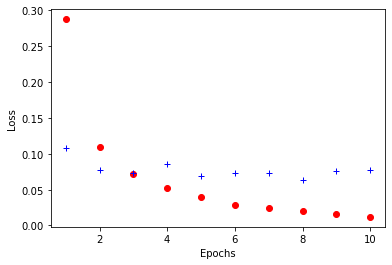

In [18]:
from matplotlib import pyplot as plt
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'ro')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

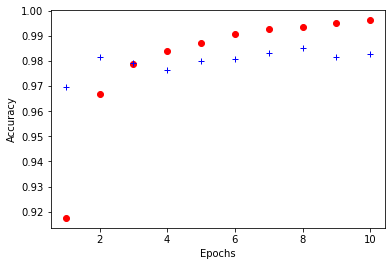

In [19]:
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'ro')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Keras Single Class

Now we'll make an example of a binary classification task using Keras.

The dataset is hosted on [Kaggle](https://www.kaggle.com/) and it's the [Promotion Response for a New Product](https://www.kaggle.com/regivm/promotion-response-and-target-datasets/version/1).

The description of th dataset is the following:

*The context of this business problem is new product introduction. A business organization developed a new product and promoted this to its existing customers. Initially it chose a sample of customers for promotion and the response information is available in the 'promoted' dataset. The organization is interested in building a model to select the best customers for contacting from the pool of customers not contacted ('target' dataset).*

and the columns are:

  - customer_id
  - **res** (what we want to predict)
  - card_tenure
  - risk_score
  - num_promoted
  - avg_bal
  - geo_group
  - res_type

## Python Class 

To learn something new, we'll make the code of this model using Python classes.

A **Class** is a blueprint for an object, that can contain variables and functions (called method).

The definition on the Python website is:

_"Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state."_

The characteristics of a Python Class are:

  - Class (note also the usage of upper and lower letters)  
  - `__init__` function (very often)
  - Properties 
  - Methods 
  - `self` parameter
  

Please note similarity of our class with all what we have used so far.

While we are looking to python classes we can also introduce two other usefull things:
  - `kargs`
  - logging

In [26]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import advanced_activations
from keras.optimizers import Adam
from sklearn import preprocessing
import logging
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Parameters
learning_rate = 0.001
num_steps = 5
batch_size = 1000
n_fold = 5

# Network Parameters
n_hidden_1 = 25 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer number of neurons
#num_input = 6 # MNIST data input (img shape: 28*28)
num_classes = 1 # MNIST total classes (0-9 digits)

trainFile = 'promoted.csv'
predFile = 'target.csv'

#
activationFun = 'relu'
#activationFun = 'softmax'

testOneHot = False

class LoadData:
    def __init__(self,**kargs):
        self.path = 'data'
        self.trainFile = kargs['tr']
        self.colList = ['avg_bal','geo_group', 'res_type']
        
    def readFiles(self,fileName):
        fullPath = os.path.join(self.path,fileName)
        logger.info('READING %s',fullPath)
        df = pd.read_csv(fullPath,sep=',',dtype={'avg_bal':'category', 'geo_group':'category', 'res_type':'category',})#dtype={'avg_bal':'category', 'geo_group':'category', 'res_type':'category',}
        logger.info('LOADED DATASET WITH SHAPE %s, COLUMUNS %s AND TYPES %s',str(df.shape),str(df.columns),str(df.dtypes))
        print('After reading',df.describe())
        return df
    
    def useOneHot(self,df):
        print('SHAPE OF DF: %i X %i'%(df.shape[0],df.shape[1]))
        df2Enc = df.loc[:,self.colList]
        print('SHAPE OF DF2ENC: %i X %i'%(df2Enc.shape[0],df2Enc.shape[1]))
        enc = OneHotEncoder()
        dfEnc = enc.fit_transform(df2Enc)
        print('SHAPE OF DFENC: %i X %i'%(dfEnc.shape[0],dfEnc.shape[1]))
        print(type(dfEnc))
        dfEnc = pd.DataFrame(dfEnc.toarray())
        print('SHAPE OF DFENC: %i X %i'%(dfEnc.shape[0],dfEnc.shape[1]))
        #df.drop(columns=self.colList,inplace=True)
        return dfEnc
        
        
    def prepareTrain(self):
        dfTrain = self.readFiles(self.trainFile)
        logger.info('REMOVING ROWS WITH NA')
        logger.info('NROWS BEFORE REMOVING NA %i',dfTrain.shape[0])
        dfTrain.dropna(inplace=True)
        dfTrain.drop(columns=['customer_id'],inplace=True)
        logger.info('NROWS AFTER REMOVING NA %i',dfTrain.shape[0])
        Y_train = dfTrain.loc[:,'resp']
        logger.info('CONSIDERING LEVELS FOR CATEGORICAL COLUMNS')
        if testOneHot:
            logger.info('Using OHE')
            dfEnc = self.useOneHot(dfTrain)
            print('SHAPE OF X_train: %i X %i'%(dfEnc.shape[0],dfEnc.shape[1]))
        else:
            for curCol in self.colList:
                dfTrain[curCol] = dfTrain[curCol].cat.codes
                dfEnc = dfTrain.copy()
        logger.info('SCALING OF NUMERIC COLUMNS')
        mmscaler = preprocessing.MinMaxScaler()
        for curCol in ['card_tenure', 'risk_score', 'num_promoted']:
            curFeat = mmscaler.fit_transform(dfTrain[[curCol]])  
            dfEnc[curCol] = curFeat.reshape(-1,1)
        print('SHAPE OF dfEnc AFTER ALL: %i X %i'%(dfEnc.shape[0],dfEnc.shape[1]))
        print('AFTER PREPROCESSING dfEnc HAS COLUMUNS %s AND TYPES %s'%(str(dfEnc.columns),str(dfEnc.dtypes)))
        return dfEnc, Y_train

class CreateNN:
    def __init__(self,**kargs):
        self.X_train = kargs['xt']
        self.Y_train = kargs['yt']
        self.kFold = kargs['kf']
        self.i = 1
        self.num_input = self.X_train.shape[1]
        
    def modelDefinition(self):
        logger.info('DEFINITION OF THE MODEL')
        self.model = Sequential()
        self.model.add(Dense(self.num_input, input_dim = self.num_input,activation=activationFun))
        self.model.add(Dense(n_hidden_1,activation = activationFun))
        self.model.add(Dense(n_hidden_2,activation = activationFun))
        self.model.add(Dense(num_classes,activation = 'sigmoid'))
        print(self.model.summary())
    
    def modelCompile(self):
        logger.info('COMPILATION OF THE MODEL')
        adam = Adam(lr = learning_rate)
        self.model.compile(loss = 'binary_crossentropy', optimizer = adam,metrics = ['accuracy'])
        
    def modelEval(self):
        logger.info('EVALUATION OF THE MODEL')
        totalScores = list()
        logger.info('START OF THE CROSS VALIDATION')
        for train,test in self.kFold.split(self.X_train, self.Y_train):
            logger.info('WORKING ON FOLD %i',self.i)
            print('train set',train)
            history = self.model.fit(self.X_train.iloc[train], self.Y_train.iloc[train],
                                     epochs=num_steps, 
                                     batch_size = batch_size) #validation_data=(self.X_train.iloc[test], self.Y_train.iloc[test])
            scores = self.model.evaluate(self.X_train.iloc[test], self.Y_train.iloc[test])
            totalScores.append(scores[1])
            self.i += 1
        return history, self.model, totalScores

    
    
def main():
    #Inizialization of the class LoadData 
    logger.info('INIZIALIZATION OF LOADDATA')
    ld = LoadData(tr=trainFile)
    print(type(ld))
    df2Pred = ld.readFiles(predFile)
    X_train, Y_train = ld.prepareTrain()
    kfold = StratifiedKFold(n_splits=n_fold)
    logger.info('INIZIALIZATION OF CreateNN')
    cnn = CreateNN(xt=X_train,yt=Y_train,kf=kfold)
    cnn.modelDefinition()
    cnn.modelCompile()
    history, model, totalScores = cnn.modelEval() 
    logger.info('EVALUATION COMPLETED')
    logger.info("FOR THE ACTUAL MODEL THE RESULTS OF %s IS: %.2f%%+/-%.2f%%" % (model.metrics_names[1], np.mean(totalScores),np.std(totalScores)))
    return X_train,Y_train, history,totalScores
    
X_train,Y_train, history,totalScores = main()

2020-10-31 18:49:19,148 : INFO : INIZIALIZATION OF LOADDATA
2020-10-31 18:49:19,150 : INFO : READING data/target.csv
2020-10-31 18:49:19,306 : INFO : LOADED DATASET WITH SHAPE (110000, 8), COLUMUNS Index(['customer_id', 'card_tenure', 'risk_score', 'num_promoted', 'avg_bal',
       'geo_group', 'res_type', 'Unnamed: 7'],
      dtype='object') AND TYPES customer_id       object
card_tenure      float64
risk_score         int64
num_promoted       int64
avg_bal         category
geo_group       category
res_type        category
Unnamed: 7       float64
dtype: object
2020-10-31 18:49:19,342 : INFO : READING data/promoted.csv


<class '__main__.LoadData'>
After reading          card_tenure     risk_score   num_promoted  Unnamed: 7
count  107792.000000  110000.000000  110000.000000         0.0
mean      138.956564     655.571482       0.006782         NaN
std        67.433081      81.252328       0.082183         NaN
min        12.000000     520.000000       0.000000         NaN
25%        91.000000     600.000000       0.000000         NaN
50%       135.000000     678.000000       0.000000         NaN
75%       179.000000     720.000000       0.000000         NaN
max       641.000000     760.000000       2.000000         NaN


2020-10-31 18:49:19,377 : INFO : LOADED DATASET WITH SHAPE (25000, 8), COLUMUNS Index(['customer_id', 'resp', 'card_tenure', 'risk_score', 'num_promoted',
       'avg_bal', 'geo_group', 'res_type'],
      dtype='object') AND TYPES customer_id       object
resp               int64
card_tenure      float64
risk_score         int64
num_promoted       int64
avg_bal         category
geo_group       category
res_type        category
dtype: object
2020-10-31 18:49:19,399 : INFO : REMOVING ROWS WITH NA
2020-10-31 18:49:19,400 : INFO : NROWS BEFORE REMOVING NA 25000
2020-10-31 18:49:19,410 : INFO : NROWS AFTER REMOVING NA 22400
2020-10-31 18:49:19,411 : INFO : CONSIDERING LEVELS FOR CATEGORICAL COLUMNS
2020-10-31 18:49:19,415 : INFO : SCALING OF NUMERIC COLUMNS
2020-10-31 18:49:19,430 : INFO : INIZIALIZATION OF CreateNN
2020-10-31 18:49:19,431 : INFO : DEFINITION OF THE MODEL
2020-10-31 18:49:19,468 : INFO : COMPILATION OF THE MODEL
2020-10-31 18:49:19,478 : INFO : EVALUATION OF THE MODEL
2020-

After reading                resp   card_tenure    risk_score  num_promoted
count  25000.000000  24515.000000  25000.000000  25000.000000
mean       0.068640    139.491617    655.091680      0.007000
std        0.252846     66.998010     81.315116      0.083374
min        0.000000      0.000000    520.000000      0.000000
25%        0.000000     95.000000    599.000000      0.000000
50%        0.000000    135.000000    677.000000      0.000000
75%        0.000000    179.000000    719.000000      0.000000
max        1.000000    641.000000    760.000000      1.000000
SHAPE OF dfEnc AFTER ALL: 22400 X 7
AFTER PREPROCESSING dfEnc HAS COLUMUNS Index(['resp', 'card_tenure', 'risk_score', 'num_promoted', 'avg_bal',
       'geo_group', 'res_type'],
      dtype='object') AND TYPES resp              int64
card_tenure     float64
risk_score      float64
num_promoted    float64
avg_bal           int16
geo_group          int8
res_type           int8
dtype: object
Model: "sequential_8"
_____________

2020-10-31 18:49:21,528 : INFO : WORKING ON FOLD 2


train set [    0     1     2 ... 22397 22398 22399]
Epoch 1/5
18/18 [==============================] - 0s 6ms/step - loss: 0.4151 - accuracy: 0.9309
Epoch 2/5
18/18 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.9304
Epoch 3/5
18/18 [==============================] - 0s 4ms/step - loss: 0.3021 - accuracy: 0.9314
Epoch 4/5
18/18 [==============================] - 0s 6ms/step - loss: 0.2953 - accuracy: 0.9314
Epoch 5/5
140/140 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.9315


2020-10-31 18:49:22,742 : INFO : WORKING ON FOLD 3


train set [    0     1     2 ... 22397 22398 22399]
Epoch 1/5
18/18 [==============================] - 0s 5ms/step - loss: 0.2866 - accuracy: 0.9314
Epoch 2/5
18/18 [==============================] - 0s 4ms/step - loss: 0.2889 - accuracy: 0.9314
Epoch 3/5
18/18 [==============================] - 0s 4ms/step - loss: 0.2788 - accuracy: 0.9314
Epoch 4/5
18/18 [==============================] - 0s 4ms/step - loss: 0.2771 - accuracy: 0.9314
Epoch 5/5
140/140 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.9315


2020-10-31 18:49:23,796 : INFO : WORKING ON FOLD 4


train set [    0     1     2 ... 22397 22398 22399]
Epoch 1/5
18/18 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.9314
Epoch 2/5
18/18 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.9314
Epoch 3/5
18/18 [==============================] - 0s 11ms/step - loss: 0.2660 - accuracy: 0.9314
Epoch 4/5
18/18 [==============================] - 0s 10ms/step - loss: 0.2580 - accuracy: 0.9314
Epoch 5/5
140/140 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9315


2020-10-31 18:49:25,339 : INFO : WORKING ON FOLD 5


train set [    0     1     2 ... 18004 18008 18031]
Epoch 1/5
18/18 [==============================] - 0s 4ms/step - loss: 0.2676 - accuracy: 0.9315
Epoch 2/5
18/18 [==============================] - 0s 4ms/step - loss: 0.2590 - accuracy: 0.9315
Epoch 3/5
18/18 [==============================] - 0s 4ms/step - loss: 0.2459 - accuracy: 0.9315
Epoch 4/5
18/18 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.9315
Epoch 5/5
140/140 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.9312


2020-10-31 18:49:26,637 : INFO : EVALUATION COMPLETED
2020-10-31 18:49:26,639 : INFO : FOR THE ACTUAL MODEL THE RESULTS OF accuracy IS: 0.93%+/-0.00%


## Exercise Model

Try to understand the best parameters for the above model using what we have learned in this lesson (hint: look if the model is overfitting).

After the definition of a good model, try to make the prediction over the pred set.

## Exercise Class

Try to re-write the first Keras Model using a *Class* approach.  

## Custom model

The models that we have built in the previous examples are made using the **Sequantial model**: `from keras.models import Sequential`.

The sequential model is the standard to create a network with a sequence of layers,one after the other.

Aside from that model, Keras give us the possibility to create networks with others layout ([more info about models](https://keras.io/models/about-keras-models/)).

This is done with the **functional API** ([more about functional API](https://keras.io/models/model/)).

The functional API usable with this import `from keras.models import Model`.

**NOTE:** with this kinf of model we are working directly with tensors ([wiki tensor](https://en.wikipedia.org/wiki/Tensor)). 

In this case we want to build a model that "simulate" a linear regression using a neural network.

In [ ]:
import keras
import tensorflow as tf
print(tf.keras.__version__,keras.__version__)

In [ ]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
x = np.array([1,2,3,4,5])
y = x*2
x_test = x*10
y_test = x_test*2

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(x,y, batch_size=1, epochs=30, shuffle=False)
#model.predict(x_test).shape
res = pd.DataFrame({'pred':model.predict(x_test)[:,0],'real':y_test})
res

In [ ]:
print(model.predict(x_test))
model.summary()
type(inputs)